<a href="https://colab.research.google.com/github/Duysky1988/data-science/blob/master/Chapter02_PMLB_SE_Ch_2_Regressmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Follow Data science workshop and ML Oreilly book / Start build model from here:

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_locat=pd.read_csv('/content/drive/My Drive/Data/NYC_zip_and_locate.csv')
df_locat.head(3)

,Unnamed: 0,url,address,neighborhood,rent,beds,baths,zip,Latitude,Longitude
0,0,https://www.renthop.com/listings/345-east-83rd...,"345 East 83rd St, Apt 29","Yorkville, Upper East Side, Upper Manhattan, M...",2150,1,1.0,10028.0,40.775331,-73.951205
1,1,https://www.renthop.com/listings/63-wall-stree...,"63 Wall Street, Apt 810","Financial District, Downtown Manhattan, Manhattan",3662,1,1.0,10005.0,40.705765,-74.008547
2,2,https://www.renthop.com/listings/blue-slip/-2r...,Blue Slip,"Greenpoint, Northern Brooklyn, Brooklyn",4121,1,1.0,NaN,NaN,NaN


In [0]:
df_locat.isnull().sum()

Unnamed: 0        0
url               0
address           3
neighborhood      0
rent              0
beds              0
baths             0
zip             879
Latitude        879
Longitude       879
dtype: int64

In [0]:
df_locat=df_locat.dropna()

In [209]:
df_new=df_locat[['zip','beds','baths','rent']]
print(df_new.shape)
df_new.head()

(2000, 4)


,zip,beds,baths,rent
0,10028.0,1,1.0,2150
1,10005.0,1,1.0,3662
2,NaN,1,1.0,4121
3,NaN,0,1.0,3245
4,10009.0,2,1.0,4150


In [0]:
df_new['zip']=df_new['zip'].astype('int')
df_new['zip']=df_new['zip'].astype('object')
df_new.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


zip       object
beds       int64
baths    float64
rent       int64
dtype: object

In [0]:
X=df_new.drop('rent',axis=1)
y=df_new['rent']
print(X.shape)
print(y.shape)

(1121, 3)
(1121,)


In [0]:
print(X.dtypes)

zip       object
beds       int64
baths    float64
dtype: object


In [0]:
X.isnull().sum()

zip      0
beds     0
baths    0
dtype: int64

In [0]:
X['beds'].value_counts()

2    367
1    357
0    177
3    168
4     45
5      7
Name: beds, dtype: int64

In [0]:
X['baths'].value_counts()

1.0    844
2.0    238
3.0     19
1.5     11
4.0      7
5.0      1
2.5      1
Name: baths, dtype: int64

In [0]:
#Not used
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [0]:
X_dum = pd.get_dummies(X, columns=['zip','beds','baths'] )
X_dum.reset_index(drop=True,inplace=True)
X_dum

,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10065,zip_10069,zip_10075,...,zip_11211,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11225,zip_11226,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11235,zip_11236,zip_11237,zip_11238,zip_11249,zip_11370,zip_11373,zip_11377,zip_11385,beds_0,beds_1,beds_2,beds_3,beds_4,beds_5,baths_1.0,baths_1.5,baths_2.0,baths_2.5,baths_3.0,baths_4.0,baths_5.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [0]:
seed = 10
test_data_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = test_data_size, 
                                                    random_state = seed)
print(X_train.shape,X_test.shape)
print(X_test.shape,y_test.shape)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

(784, 99) (337, 99)
(337, 99) (337,)


f = plt.figure(figsize=(19, 15))
plt.matshow(train_data.corr(), fignum=f.number,cmap='RdYlBu_r')
plt.xticks(range(train_data.shape[1]), train_data.columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.shape[1]), train_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
corrMatrix=train_data.corr()
corrMatrix.sort_values(by='rent',ascending=False)[:10]

,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10065,zip_10069,zip_10075,...,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11225,zip_11226,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11235,zip_11236,zip_11237,zip_11238,zip_11249,zip_11370,zip_11373,zip_11377,zip_11385,beds_0,beds_1,beds_2,beds_3,beds_4,beds_5,baths_1.0,baths_1.5,baths_2.0,baths_2.5,baths_3.0,baths_4.0,baths_5.0,rent
rent,0.034959,-0.038607,-0.015674,NaN,-0.002858,0.039658,NaN,-0.034683,0.039681,-0.067885,0.061486,0.025792,0.008045,-0.050486,-0.031702,-0.005331,-0.025623,-0.044750,-0.021242,0.249119,-0.074774,-0.007405,-0.015420,-0.039147,0.018632,0.076222,-0.014699,0.022547,0.068847,-0.043580,-0.012377,0.025720,0.030463,-0.009718,-0.033990,-0.018037,0.029049,-0.021811,0.088959,NaN,...,0.047344,NaN,-0.058875,-0.044630,-0.024910,NaN,-0.044543,-0.027017,0.083555,0.060527,-0.016983,-0.046086,NaN,-0.041741,-0.041609,0.262577,-0.054680,-0.003438,-0.022031,-0.058689,-0.019016,0.081523,NaN,NaN,NaN,0.008875,-0.005470,-0.010021,0.059652,-0.061095,0.006209,-0.021908,-0.129108,0.078835,0.134181,-0.009595,-0.018093,-0.052303,NaN,1.000000
zip_11232,-0.014569,-0.013462,-0.016264,NaN,-0.009982,-0.003138,-0.004441,-0.013074,-0.009982,-0.013074,-0.008335,-0.009464,-0.011841,-0.017517,-0.010949,-0.008917,-0.022427,-0.008335,-0.011403,-0.013074,-0.007712,-0.014569,-0.006289,-0.006289,-0.010476,-0.009982,-0.006289,-0.010949,-0.014569,-0.013074,-0.004441,-0.004441,-0.013074,-0.005443,-0.009982,-0.007036,-0.007036,-0.014209,-0.014922,-0.005443,...,-0.008917,-0.003138,-0.008335,-0.015606,-0.011841,NaN,-0.004441,-0.004441,-0.017818,-0.007036,-0.005443,-0.010476,-0.003138,-0.008917,-0.003138,1.000000,-0.009982,-0.003138,-0.003138,-0.012676,-0.012676,-0.007036,-0.003138,-0.003138,NaN,-0.006289,-0.038065,-0.026360,0.091316,-0.036410,-0.019266,-0.005443,-0.047666,-0.009464,0.057221,-0.003138,-0.011403,-0.006289,NaN,0.262577
zip_10023,-0.024699,-0.022822,-0.027573,NaN,-0.016922,-0.005320,-0.007529,-0.022164,-0.016922,-0.022164,-0.014131,-0.016043,-0.020075,-0.029696,-0.018561,-0.015116,-0.038020,-0.014131,-0.019332,1.000000,-0.013074,-0.024699,-0.010661,-0.010661,-0.017760,-0.016922,-0.010661,-0.018561,-0.024699,-0.022164,-0.007529,-0.007529,-0.022164,-0.009227,-0.016922,-0.011927,-0.011927,-0.024088,-0.025297,-0.009227,...,-0.015116,-0.005320,-0.014131,-0.026456,-0.020075,NaN,-0.007529,-0.007529,-0.030207,-0.011927,-0.009227,-0.017760,-0.005320,-0.015116,-0.005320,-0.013074,-0.016922,-0.005320,-0.005320,-0.021489,-0.021489,-0.011927,-0.005320,-0.005320,NaN,-0.010661,0.007469,0.034578,-0.033070,0.012534,-0.032661,-0.009227,-0.050915,-0.016043,0.044743,-0.005320,0.049248,-0.010661,NaN,0.249119
baths_2.0,-0.033338,0.099882,0.052660,NaN,0.019796,-0.019368,0.032952,-0.080686,-0.061603,-0.017972,-0.019074,0.027343,-0.004106,0.018868,0.056435,0.005565,0.064797,0.013294,0.001156,0.044743,0.022282,-0.052197,-0.038811,0.003925,0.090671,0.019796,-0.038811,-0.017968,0.004378,-0.059782,-0.027409,-0.027409,0.023838,0.015726,0.046929,-0.043420,-0.043420,0.028179,0.073840,-0.033590,...,-0.024732,-0.019368,-0.051441,-0.025611,-0.027097,NaN,0.093312,-0.027409,-0.016222,-0.005171,-0.033590,-0.038765,-0.019368,0.035861,-0.019368,0.057221,-0.007337,-0.019368,-0.019368,-0.035158,0.072513,0.033077,-0.019368,-0.019368,NaN,0.003925,-0.218227,-0.286145,0.233740,0.171179,0.186585,0.015726,-0.910827,-0.058404,1.000000,-0.019368,-0.070375,-0.038811,NaN,0.134181
zip_11201,-0.024699,-0.022822,-0.027573,NaN,-0.016922,-0.005320,-0.007529,-0.022164,-0.016922,-0.022164,-0.014131,-0.016043,-0.020075,-0.029696,-0.018561,-0.015116,-0.038

### Evaluating the performance of linear regression models

In [0]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

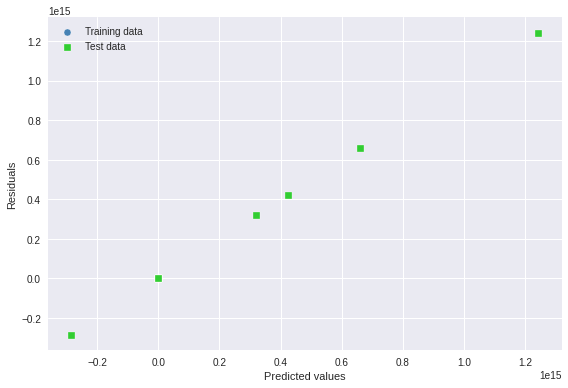

In [0]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
#plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
#plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
# Kết quả test khá tệ do không sử dụng hàm thời gian ? Hoặc chưa thử các phương pháp regression khác ?

MSE train: 1592370.930, test: 6953931713513060714460217344.000
R^2 train: 0.686, test: -1428090454863969255424.000


In [0]:
y_test_pred_df=pd.DataFrame(y_test_pred,columns=['y_test_pred_df'])
y_test_df=pd.DataFrame(y_test)
y_test_df.reset_index(drop=True,inplace=True)
#pd.concat([y_test_df, y_test_pred_df],axis=1)

In [0]:
y_train_pred_df=pd.DataFrame(y_train_pred,columns=['y_train_pred_df'])
y_train_df=pd.DataFrame(y_train)
y_train_df.reset_index(drop=True,inplace=True)
#pd.concat([y_train_df, y_train_pred_df],axis=1)

## Using regularized methods for regression

In [0]:
#LASSO regression:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1590217.117, test: 3285862.180
R^2 train: 0.687, test: 0.325


In [233]:
#Ridge regression: BEST
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
#ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1625816.161, test: 3018290.529
R^2 train: 0.680, test: 0.380


In [235]:
#Elastic Net regression:
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=1.0, l1_ratio=0.5,random_state=42)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 3960963.075, test: 3903938.201
R^2 train: 0.220, test: 0.198


In [234]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

#sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)
y_train_pred = sgd_reg.predict(X_train)
y_test_pred = sgd_reg.predict(X_test)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1636317.554, test: 3118037.623
R^2 train: 0.678, test: 0.360


In [230]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
print(X_train.shape)
print(X_train_poly.shape)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)
#print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

(784, 99)
(784, 5049)
MSE train: 494000.921, test: 175207361911968780659932004352.000
R^2 train: 0.903, test: -35981365862733619134464.000


### Early stopping example

In [0]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.5, random_state=10)

In [246]:
y_train1.shape

(392,)

In [0]:
from sklearn.base import clone

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly_scaled = poly_features.fit_transform(X_train1)
X_val_poly_scaled = poly_features.transform(X_val1)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  print(epoch)
  sgd_reg.fit(X_train_poly_scaled, y_train1)  # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val1, y_val_predict)
  if val_error < minimum_val_error:
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)

AttributeError: ignored

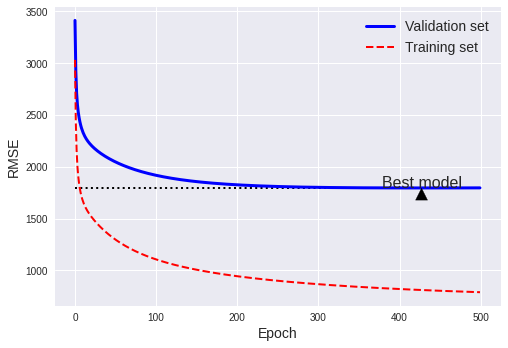

In [253]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train1)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train1, y_train_predict))
    val_errors.append(mean_squared_error(y_val1, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.save_fig("early_stopping_plot")
plt.show()

In [0]:
from sklearn.base import clone

poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly_scaled = poly_features.fit_transform(X_train1)
X_val_poly_scaled = poly_features.transform(X_val1)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  print(epoch)
  sgd_reg.fit(X_train_poly_scaled, y_train1)  # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val1, y_val_predict)
  if val_error < minimum_val_error:
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)

AttributeError: ignored

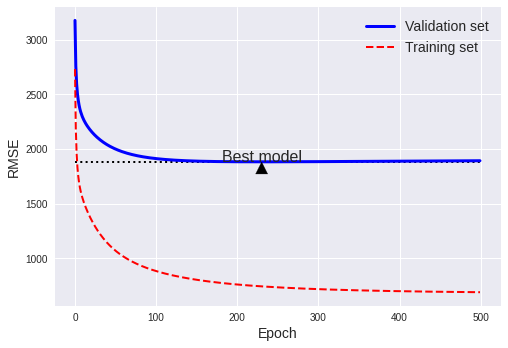

In [255]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train1)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train1, y_train_predict))
    val_errors.append(mean_squared_error(y_val1, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.save_fig("early_stopping_plot")
plt.show()

In [256]:
best_epoch, best_model

(230,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))